# Total Data Preprocessing

## Import

In [8]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt

In [9]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## Hyper Parameter

In [10]:
# Local
DATA_DIR = '/Users/inseoklee/Desktop/miso/data'
SAVE_DIR = '/Users/inseoklee/Desktop/miso/data'

## Load Data

In [11]:
df = pd.read_csv(DATA_DIR+'/processed_sentiment.csv')
new_df = pd.read_csv(DATA_DIR+'/new_processed_sentiment.csv')

In [12]:
df.shape

(37212, 2)

In [13]:
new_df.shape

(87680, 2)

In [14]:
total_df = pd.concat([df, new_df], ignore_index=True)
total_df.shape

(124892, 2)

## Data PreProcessing

### Label 재정의

In [15]:
total_df['label'].unique()

array(['angry', 'sad', 'fear', 'disgusting', 'neutral', 'happy',
       'surprised', 'anxious', 'embarrassed', 'hurt'], dtype=object)

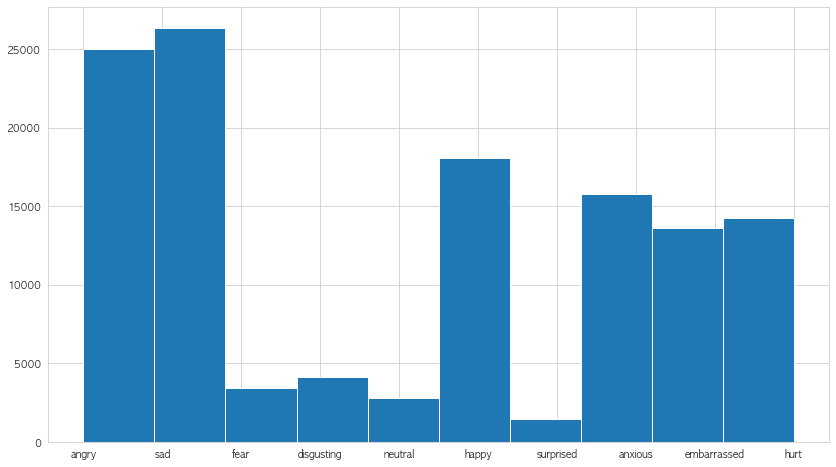

In [16]:
label = total_df['label']

plt.figure(figsize=(14, 8))
plt.hist(label)
plt.show()

### check duplicate

In [17]:
print(len(total_df), total_df['text'].nunique())

124892 124868


In [18]:
total_df.drop_duplicates(subset=['text'], inplace=True)
total_df['text'].nunique()

124868

In [19]:
total_df = total_df.dropna(how='any') # Null 값 제거
total_df.shape

(124868, 2)

### Split Data

In [20]:
label_anxious = total_df[total_df['label'] == 'anxious']
label_embarrassed = total_df[total_df['label'] == 'embarrassed']
label_hurt = total_df[total_df['label'] == 'hurt']

In [21]:
label_anxious.head()

,text,label
37213,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,anxious
37217,이제 곧 은퇴할 시기가 되었어. 내가 먼저 은퇴를 하고 육 개월 후에 남편도 은퇴를...,anxious
37225,아내의 건강이 갑자기 악화됐어. 너무 걱정스럽고 불안해.,anxious
37228,이번에도 고시에 불합격했어. 부모님께 무슨 소리를 들을지 벌써부터 두려워.,anxious
37231,공부를 해도 성적이 오르지 않아.,anxious


In [22]:
label_embarrassed.head()

,text,label
37214,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,embarrassed
37223,오늘 선생님이 나보고 앞에 나와 문제를 풀어보라고 했는데 답을 외워서 문제를 풀었어.,embarrassed
37224,내가 무능해서 자기가 좋은 대학에 못 들어갔다는 딸의 말을 듣고 괴로워.,embarrassed
37234,요즘 아들이 말도 없이 사업을 시작했나봐.,embarrassed
37236,교수님께서 과제로 내주신 에세이에 엄청 애쓴 내가 너무 한심해.,embarrassed


In [23]:
label_hurt.head()

,text,label
37222,새로 간 치과에서 조금 썩기만 한 이를 임플란트를 하라고 했어. 과잉진료는 안 한다더니.,hurt
37248,부인이 건강검진 결과가 나왔는데 건강 상태가 좋질 않아 충격을 받은 모양이야.,hurt
37250,나 병원에 가 봐야 할 것 같아.,hurt
37258,아들 녀석이 학원을 제대로 다니는가 싶었는데 그게 아니었어. 정말 속상해.,hurt
37265,치과의 과잉 진료로 안 해도 되는 임플란트까지 하게 되어 큰돈을 지불했어.,hurt


angry
sad
fear
disgusting
neutral
happy
surprised
anxious
embarrassed
hurt

In [24]:
total_df = total_df[total_df['label'].isin(['angry', 'sad', 'fear', 'disgusting', 'neutral', 'happy', 'surprised'])]
total_df['label'].unique()

array(['angry', 'sad', 'fear', 'disgusting', 'neutral', 'happy',
       'surprised'], dtype=object)

## Save Data

In [25]:
total_df.to_csv(SAVE_DIR + '/total_sentiment.csv', encoding="utf-8-sig", index=False)

In [26]:
label_anxious.to_csv(SAVE_DIR + '/label_anxious.csv', encoding="utf-8-sig", index=False)
label_embarrassed.to_csv(SAVE_DIR + '/label_embarrassed.csv', encoding="utf-8-sig", index=False)
label_hurt.to_csv(SAVE_DIR + '/label_hurt.csv', encoding="utf-8-sig", index=False)